In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from wordcloud import WordCloud

In [2]:
# load data from database
engine = create_engine('sqlite:///../data/DisasterResponse.db')
df = pd.read_sql_table("DisasterData", con=engine)

In [4]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [13]:
#Utility function to get all the words from messages that are classified with a 1 or above for that particular column
# e.g. All the words from messages that has category related > 1
def getWordsFromColumn(columnName):
    positive = df[df[columnName] > 0]["message"]
    positive_tokens = tokenizer.tokenize(str(positive.values))
    positive_tokens = " ".join(positive_tokens)
    return positive_tokens

In [11]:
#Let's get a word cloud for related
related = df[df["related"] == 1]["message"]
related_tokens = tokenizer.tokenize(str(related.values))
related_tokens = " ".join(related_tokens)

In [14]:
related_tokens

'Weather update a cold front from Cuba that could pass over Haiti Is the Hurricane over or is it not over Looking for someone but no name Proshika operating in Cox s Bazar municipality and 5 other unions Ramu and Chokoria assessment 5 kg rice 1 5 kg lentils to 700 families Some 2 000 women protesting against the conduct of the elections were teargassed as they tried to converge on the local electoral commission offices in the southern oil city of Port Harcourt A radical shift in thinking came about as a result of this meeting recognizing that HIV AIDS is at the core of the humanitarian crisis and identifying the crisis itself as a function of the HIV AIDS pandemic'

In [24]:
#Utility function for generating a word cloud
def showWordCloud(text):
    wordcloud = WordCloud(max_font_size=40).generate(text)
    wordcloud.background_color = "white"
    plt.figure(figsize=(14,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

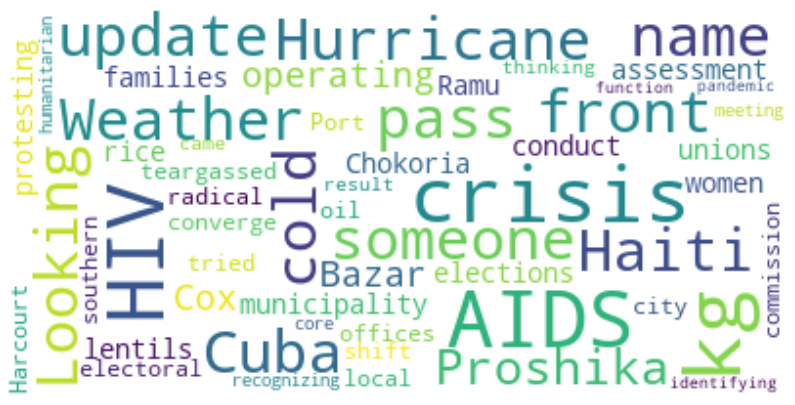

In [31]:
showWordCloud(getWordsFromColumn("related"))

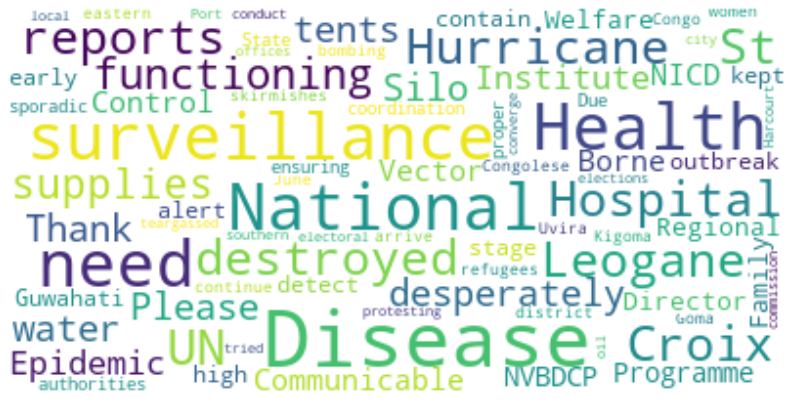

In [30]:
showWordCloud(getWordsFromColumn("aid_related"))

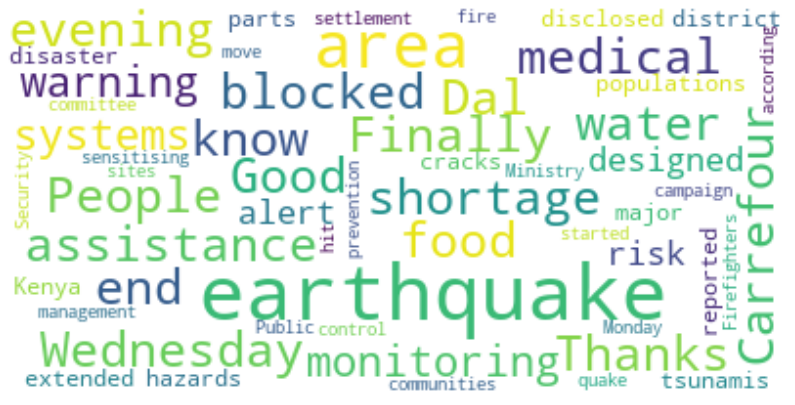

In [32]:
showWordCloud(getWordsFromColumn("earthquake"))